In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder

# Load the data
train_features = pd.read_csv("train.csv")
train_labels = pd.read_csv("train_labels.csv")
val_features = pd.read_csv("validation.csv")
val_labels = pd.read_csv("validation_labels.csv")

# Handle missing values
train_features = train_features.fillna('Missing')
val_features = val_features.fillna('Missing')

# Encode categorical columns
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
categorical_cols = train_features.select_dtypes(include=['object']).columns
train_features[categorical_cols] = encoder.fit_transform(train_features[categorical_cols])
val_features[categorical_cols] = encoder.transform(val_features[categorical_cols])

# Encode labels
le = LabelEncoder()
train_labels = le.fit_transform(train_labels.squeeze())
val_labels = le.transform(val_labels.squeeze())

# Standardize features
scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(train_features)
val_features_scaled = scaler.transform(val_features)


  decision_function_shape  train_f1    val_f1
0                     ovo  0.797615  0.805423
1                     ovr  0.797615  0.805423


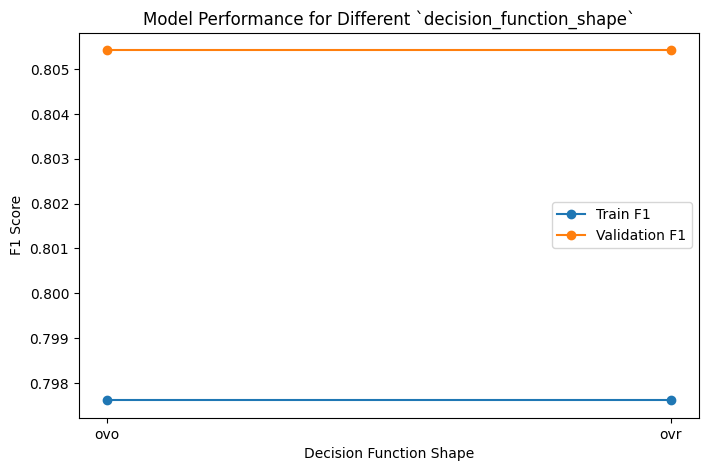

In [17]:
from sklearn.metrics import f1_score

dfs_list = ['ovo', 'ovr']
train_dfs_metric = []
val_dfs_metric = []

for dfs in dfs_list:
    # Train SVM model
    model = SVC(decision_function_shape=dfs, kernel='linear', random_state=42)
    model.fit(train_features_scaled, train_labels)
    
    # Predictions
    train_preds = model.predict(train_features_scaled)
    val_preds = model.predict(val_features_scaled)
    
    # Evaluate using F1 score
    train_f1 = f1_score(train_labels, train_preds, average='weighted')
    val_f1 = f1_score(val_labels, val_preds, average='weighted')
    
    train_dfs_metric.append(train_f1)
    val_dfs_metric.append(val_f1)

# Create a dataframe to display results
df_dfs_metrics = pd.DataFrame({
    'decision_function_shape': dfs_list,
    'train_f1': train_dfs_metric,
    'val_f1': val_dfs_metric
})

print(df_dfs_metrics)

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(dfs_list, train_dfs_metric, label='Train F1', marker='o')
plt.plot(dfs_list, val_dfs_metric, label='Validation F1', marker='o')
plt.title("Model Performance for Different `decision_function_shape`")
plt.xlabel("Decision Function Shape")
plt.ylabel("F1 Score")
plt.legend()
plt.show()


   degree  train_f1    val_f1
0       2  0.800386  0.774451
1       3  0.830946  0.770042
2       4  0.853196  0.748777
3       5  0.866529  0.743140
4       6  0.865626  0.713435


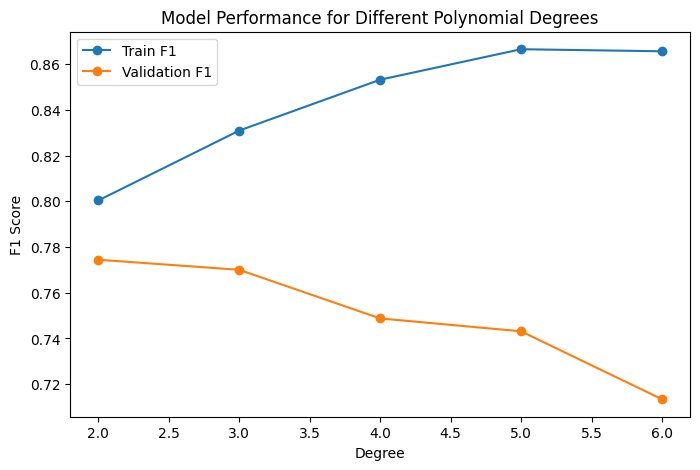

In [18]:
d_list = [2, 3, 4, 5, 6]
train_d_metric = []
val_d_metric = []

for degree in d_list:
    model = SVC(kernel='poly', degree=degree, decision_function_shape='ovr', random_state=42)
    model.fit(train_features_scaled, train_labels)
    
    train_preds = model.predict(train_features_scaled)
    val_preds = model.predict(val_features_scaled)
    
    train_f1 = f1_score(train_labels, train_preds, average='weighted')
    val_f1 = f1_score(val_labels, val_preds, average='weighted')
    
    train_d_metric.append(train_f1)
    val_d_metric.append(val_f1)

df_degree_metrics = pd.DataFrame({
    'degree': d_list,
    'train_f1': train_d_metric,
    'val_f1': val_d_metric
})

print(df_degree_metrics)

plt.figure(figsize=(8, 5))
plt.plot(d_list, train_d_metric, label='Train F1', marker='o')
plt.plot(d_list, val_d_metric, label='Validation F1', marker='o')
plt.title("Model Performance for Different Polynomial Degrees")
plt.xlabel("Degree")
plt.ylabel("F1 Score")
plt.legend()
plt.show()


   gamma  train_f1    val_f1
0    0.1  0.889387  0.743511
1    0.5  0.967725  0.653071
2    1.0  0.975348  0.633195
3    5.0  0.991235  0.622073
4   10.0  0.992259  0.621146


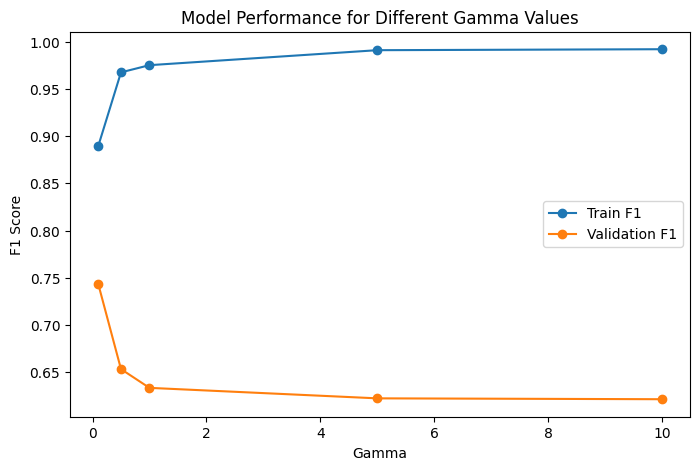

In [19]:
g_list = [0.1, 0.5, 1, 5, 10]
train_g_metric = []
val_g_metric = []

for gamma in g_list:
    model = SVC(kernel='rbf', gamma=gamma, decision_function_shape='ovr', random_state=42)
    model.fit(train_features_scaled, train_labels)
    
    train_preds = model.predict(train_features_scaled)
    val_preds = model.predict(val_features_scaled)
    
    train_f1 = f1_score(train_labels, train_preds, average='weighted')
    val_f1 = f1_score(val_labels, val_preds, average='weighted')
    
    train_g_metric.append(train_f1)
    val_g_metric.append(val_f1)

df_gamma_metrics = pd.DataFrame({
    'gamma': g_list,
    'train_f1': train_g_metric,
    'val_f1': val_g_metric
})

print(df_gamma_metrics)

plt.figure(figsize=(8, 5))
plt.plot(g_list, train_g_metric, label='Train F1', marker='o')
plt.plot(g_list, val_g_metric, label='Validation F1', marker='o')
plt.title("Model Performance for Different Gamma Values")
plt.xlabel("Gamma")
plt.ylabel("F1 Score")
plt.legend()
plt.show()


        C  train_f1    val_f1
0     0.1  0.622318  0.622535
1     1.0  0.975348  0.633195
2    10.0  0.993700  0.663756
3   100.0  0.997360  0.660158
4  1000.0  0.998986  0.660697


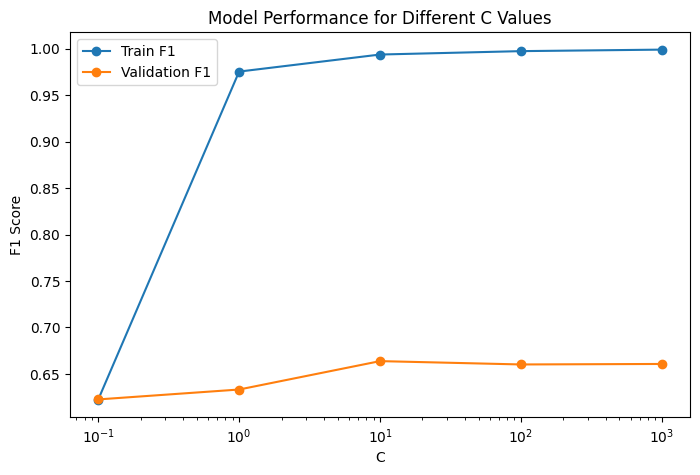

In [20]:
C_list = [0.1, 1, 10, 100, 1000]
train_C_metric = []
val_C_metric = []

for C in C_list:
    model = SVC(kernel='rbf', C=C, gamma=1, decision_function_shape='ovr', random_state=42)
    model.fit(train_features_scaled, train_labels)
    
    train_preds = model.predict(train_features_scaled)
    val_preds = model.predict(val_features_scaled)
    
    train_f1 = f1_score(train_labels, train_preds, average='weighted')
    val_f1 = f1_score(val_labels, val_preds, average='weighted')
    
    train_C_metric.append(train_f1)
    val_C_metric.append(val_f1)

df_C_metrics = pd.DataFrame({
    'C': C_list,
    'train_f1': train_C_metric,
    'val_f1': val_C_metric
})

print(df_C_metrics)

plt.figure(figsize=(8, 5))
plt.plot(C_list, train_C_metric, label='Train F1', marker='o')
plt.plot(C_list, val_C_metric, label='Validation F1', marker='o')
plt.xscale('log')
plt.title("Model Performance for Different C Values")
plt.xlabel("C")
plt.ylabel("F1 Score")
plt.legend()
plt.show()


In [22]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score


best_model = SVC(kernel='rbf', C=10, gamma=1, decision_function_shape='ovr', random_state=42)
best_model.fit(train_features_scaled, train_labels)

train_preds = best_model.predict(train_features_scaled)
val_preds = best_model.predict(val_features_scaled)

print("Classification Report (Training):")
print(classification_report(train_labels, train_preds))

print("Classification Report (Validation):")
print(classification_report(val_labels, val_preds))

print("Confusion Matrix (Validation):")
print(confusion_matrix(val_labels, val_preds))


Classification Report (Training):
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3622
           1       0.99      0.98      0.99      1308

    accuracy                           0.99      4930
   macro avg       0.99      0.99      0.99      4930
weighted avg       0.99      0.99      0.99      4930

Classification Report (Validation):
              precision    recall  f1-score   support

           0       0.75      0.98      0.85       776
           1       0.58      0.09      0.15       280

    accuracy                           0.74      1056
   macro avg       0.66      0.53      0.50      1056
weighted avg       0.70      0.74      0.66      1056

Confusion Matrix (Validation):
[[758  18]
 [255  25]]
